Load USD/EUR rates from 2010 to 2020 using the function from 2.
Prove or disprove the theory that historically FX rates are more likely to go down between Friday and Monday due to profit taking.

In [3]:
from func import api_to_df , scrape_exchange_api
import pandas as pd


import requests
import io
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from asset_portfolio import AssetPortfolio
from stock  import Stock,Currency_asset,Currency_Dominated_Stock

sns.set(rc={'figure.figsize':(11, 4)})

import numpy as np

%matplotlib inline
np.random.seed(42)

In [4]:
json_path= 'exchange_rate20201115-215236.txt'
json_path= 'exchange_rate_years20201116-123856.txt'

exchange_df = api_to_df(json_path)

In [5]:
exchange_df

,CAD,HKD,ISK,PHP,DKK,HUF,CZK,AUD,RON,SEK,...,ZAR,USD,MXN,ILS,GBP,KRW,MYR,start_at,base,date
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.5547,8.9294,133.4,59.894,7.4669,322.37,25.752,1.6273,4.6600,10.2145,...,16.5075,1.1397,22.3941,4.2708,0.90165,1278.52,4.7195,2019-01-01,EUR,2019-01-02
2019-01-03,1.5392,8.8884,133.6,59.679,7.4675,322.41,25.683,1.6287,4.6660,10.2808,...,16.4149,1.1348,22.2384,4.2425,0.90312,1279.17,4.7020,2019-01-01,EUR,2019-01-03
2019-01-04,1.5328,8.9325,134.0,59.809,7.4679,321.45,25.653,1.6189,4.6656,10.2460,...,16.1175,1.1403,22.3080,4.2320,0.89988,1279.13,4.7106,2019-01-01,EUR,2019-01-04
2019-01-05,1.5328,8.9325,134.0,59.809,7.4679,321.45,25.653,1.6189,4.6656,10.2460,...,16.1175,1.1403,22.3080,4.2320,0.89988,1279.13,4.7106,2019-01-01,EUR,2019-01-04
2019-01-06,1.5328,8.9325,134.0,59.809,7.4679,321.45,25.653,1.6189,4.6656,10.2460,...,16.1175,1.1403,22.3080,4.2320,0.89988,1279.13,4.7106,2019-01-01,EUR,2019-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.4592,8.6845,135.6,56.574,7.4704,330.83,25.509,1.5996,4.7818,10.4363,...,15.6649,1.1153,21.0989,3.8611,0.85130,1294.42,4.6034,2019-01-01,EUR,2019-12-27
2019-12-28,1.4592,8.6845,135.6,56.574,7.4704,330.83,25.509,1.5996,4.7818,10.4363,...,15.6649,1.1153,21.0989,3.8611,0.85130,1294.42,4.6034,2019-01-01,EUR,2019-12-27
2019-12-29,1.4592,8.6845,135.6,56.574,7.4704,330.83,25.509,1.5996,4.7818,10.4363,...,15.6649,1.1153,21.0989,3.8611,0.85130,1294.42,4.6034,2019-01-01,EUR,2019-12-27


In [6]:
portfolio = AssetPortfolio()
portfolio.add( Stock('ABC',200,4) )
portfolio.add( Stock('DDW',100,10) )
portfolio.add( Stock('DDW',100,10) )
portfolio.add(Currency_asset(10,'$'))
portfolio.add(Currency_Dominated_Stock('DDW',100,10,'EUR'))


change_inval=portfolio.portfolio_to_currency(exchange_df.USD,'EUR')
dfchanges= pd.DataFrame(change_inval)

<Figure size 1440x720 with 0 Axes>

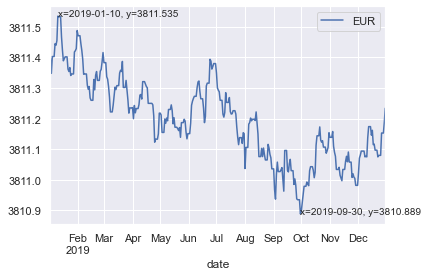

In [12]:
#fig = plt.figure()
plt.figure(figsize=(20,10))

#ax = fig.add_subplot(111)

dfchanges.plot()

minval=dfchanges[dfchanges.EUR==dfchanges.EUR.min()]
minx=minval.index[0].strftime('%Y-%m-%d')
miny= minval.EUR.values[0]

maxval=dfchanges[dfchanges.EUR==dfchanges.EUR.max()]
maxx=maxval.index[0].strftime('%Y-%m-%d')
maxy= maxval.EUR.values[0]

text= "x={}, y={}".format(minx, miny)
plt.annotate(text, xy=(minx, miny) )

#ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
text= "x={}, y={}".format(maxx, maxy)
plt.annotate(text, xy=(maxx, maxy) )
#plt.annotate('max ', xy=(maxval.index[0], maxval.EUR))

ax.set_ylim(0,20)
plt.show()


In [2]:
#url= 'https://api.exchangeratesapi.io/history?start_at=2010-01-01&end_at=2020-11-01&symbols=USD'

#scrape_exchange_api(url, 'usd_rate')


In [3]:
df = api_to_df('usd_rate20201119.txt')


In [4]:
df.set_index(df.date, inplace=True)
df['day']=df.date.dt.strftime("%A")

<AxesSubplot:xlabel='date'>

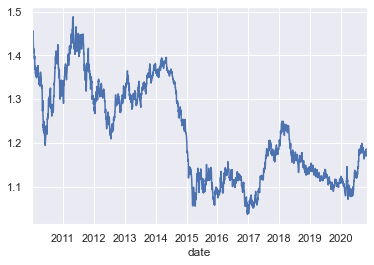

In [5]:
df['USD'].plot()

Hypotheses testing : 

$$H_0: \mu_{monday} - \mu_{friday} >= 0$$


$$H_1: \mu_{monday} - \mu_{Friday} < 0$$



In [6]:
# sampling the data 
sample_data = df.sample(300)


In [7]:
friday_means, monday_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(300, replace = True)
    #coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()

    monday_mean = bootsamp[bootsamp.day=='Monday']['USD'].mean()
    friday_mean = bootsamp[bootsamp.day=='Friday']['USD'].mean()
    #monday_mean = bootsamp['Monday'].mean()
    #friday_mean = bootsamp['Fridays'].mean()
    
    # append the info 
    monday_means.append(monday_mean)
    friday_means.append(friday_mean)
    diffs.append(monday_mean - friday_mean)   

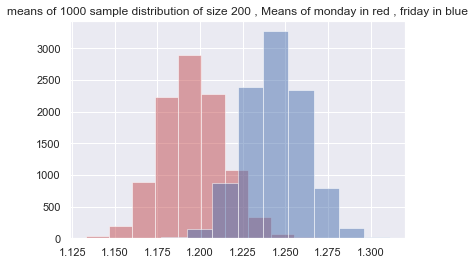

In [8]:


plt.title('means of 1000 sample distribution of size 200 , Means of monday in red , friday in blue')




plt.hist(monday_means, alpha = 0.5 , color = 'r' ,);
plt.hist(friday_means, alpha = 0.5 , color = 'b'); 

creating the null values 

In [9]:
null_vals = np.random.normal(0, np.std(diffs), 10000)

Text(0.5, 1.0, 'null_vals')

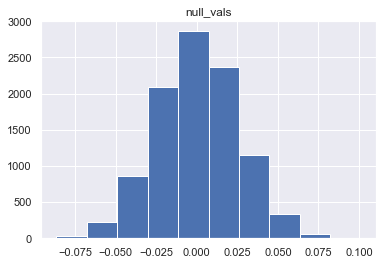

In [10]:
#Here is the sampling distribution of the difference under the null
plt.hist(null_vals);
plt.title('null_vals')   

In [11]:

#Since the sample Mean does not fall in null vals ,  we reject the null
#null hypotheses in favor of alternative 

sample_mean= sample_data[sample_data.day=='Monday']['USD'].mean()-sample_data[sample_data.day=='Friday']['USD'].mean()
#sample_mean=sample_data['Monday'].mean()- sample_data['Fridays'].mean()


In [12]:
sample_mean

-0.049103268384663945

In [14]:
p = (null_vals<sample_mean).mean()
p

0.0258

since P< 0.5 then we reject the null hypothesis in favor of alternative hypothesis.